In [5]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [6]:
def mira_map(x, y, n=10):
    p1 = 0.9
    p2 = -0.5952
    for _ in range(n):
        xn = p1 * x + y
        yn = p2 + x ** 2
        x, y = xn, yn
    return xn, yn

In [35]:
def approx_segment(a, b, depth=0, am=None, bm=None, eps=1e-2):
    am = np.array(mira_map(*a)) if am is None else am
    bm = np.array(mira_map(*b)) if bm is None else bm
    if np.sqrt(np.sum((am - bm) ** 2)) < eps or depth > 10:
        plt.plot(*zip(am, bm), c="c")
    else:
        midpoint = (a + b) / 2
        mp_m = np.array(mira_map(*midpoint))
        approx_segment(a, midpoint, depth+1, am=am, bm=mp_m)
        approx_segment(midpoint, b, depth+1, am=mp_m, bm=bm)

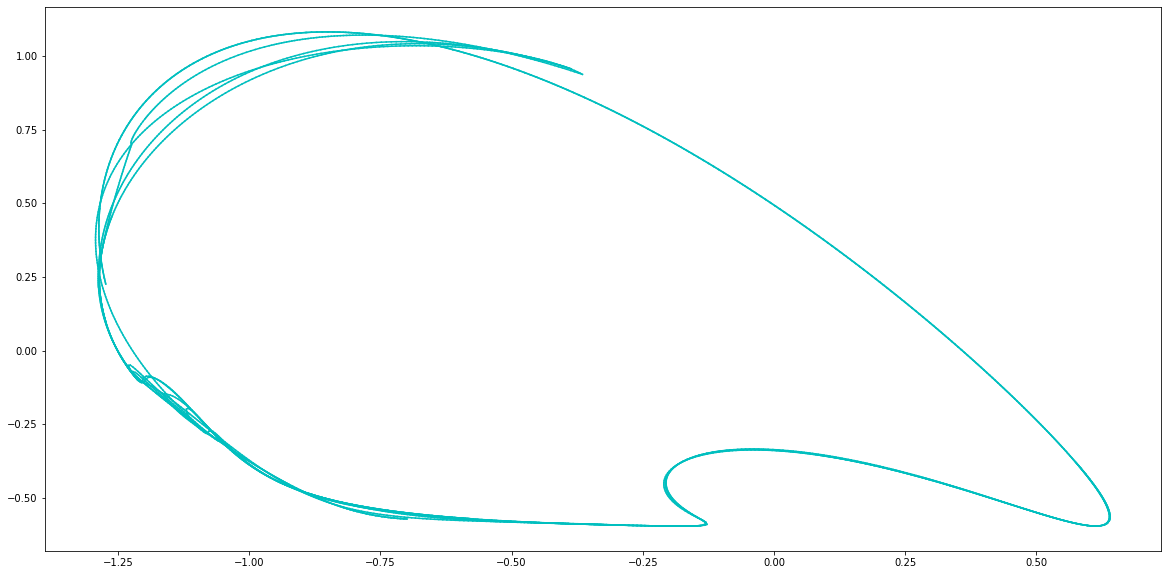

In [57]:
path = np.random.uniform(-0.7, 0.59, (20, 2))
for a, b in zip(path[:-1], path[1:]):
    approx_segment(a, b)